# **`Q.(A)`**
### **In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.**
## ***`Solution`:-***

### ***`Load the data`***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [2]:
data = pd.read_csv('nba_2013.csv')

In [3]:
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


### **`Data Description:`**
- A look at the data
  - Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season.
    - Download 'nba_2013.csv' file from this link: https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
  - Here are some selected columns from the data:
     - `player` - name of the player
     - `pos` - the position of the player
     - `g` - number of games the player was in
     - `gs` - number of games the player started
     - `pts` - total points the player scored
  - There are many more columns in the data, mostly containing information about average player game performance over the course of the season.

### ***`Performing both Statistical and Graphical Data Analysis`***

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [5]:
data.shape

(481, 31)

In [6]:
data.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [7]:
data.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [8]:
data['ft.'].fillna(data['ft.'].median(), inplace = True)
data['x3p.'].fillna(data['x3p.'].median(), inplace = True)

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum().sum()

0

In [11]:
col_list = ['player','bref_team_id','season','season_end']

In [12]:
data.drop(columns=col_list, inplace=True, axis=1)

In [13]:
data.shape

(478, 27)

- Let's see how data is `distributed for every column`.
- Let's visualize the data and analyze the `relationship between independent and dependent variable`.

In [15]:
numeric_col = list(data.describe().columns)

In [16]:
cat_col = []
for i in data.columns:
    if i not in numeric_col:
        cat_col.append(i)

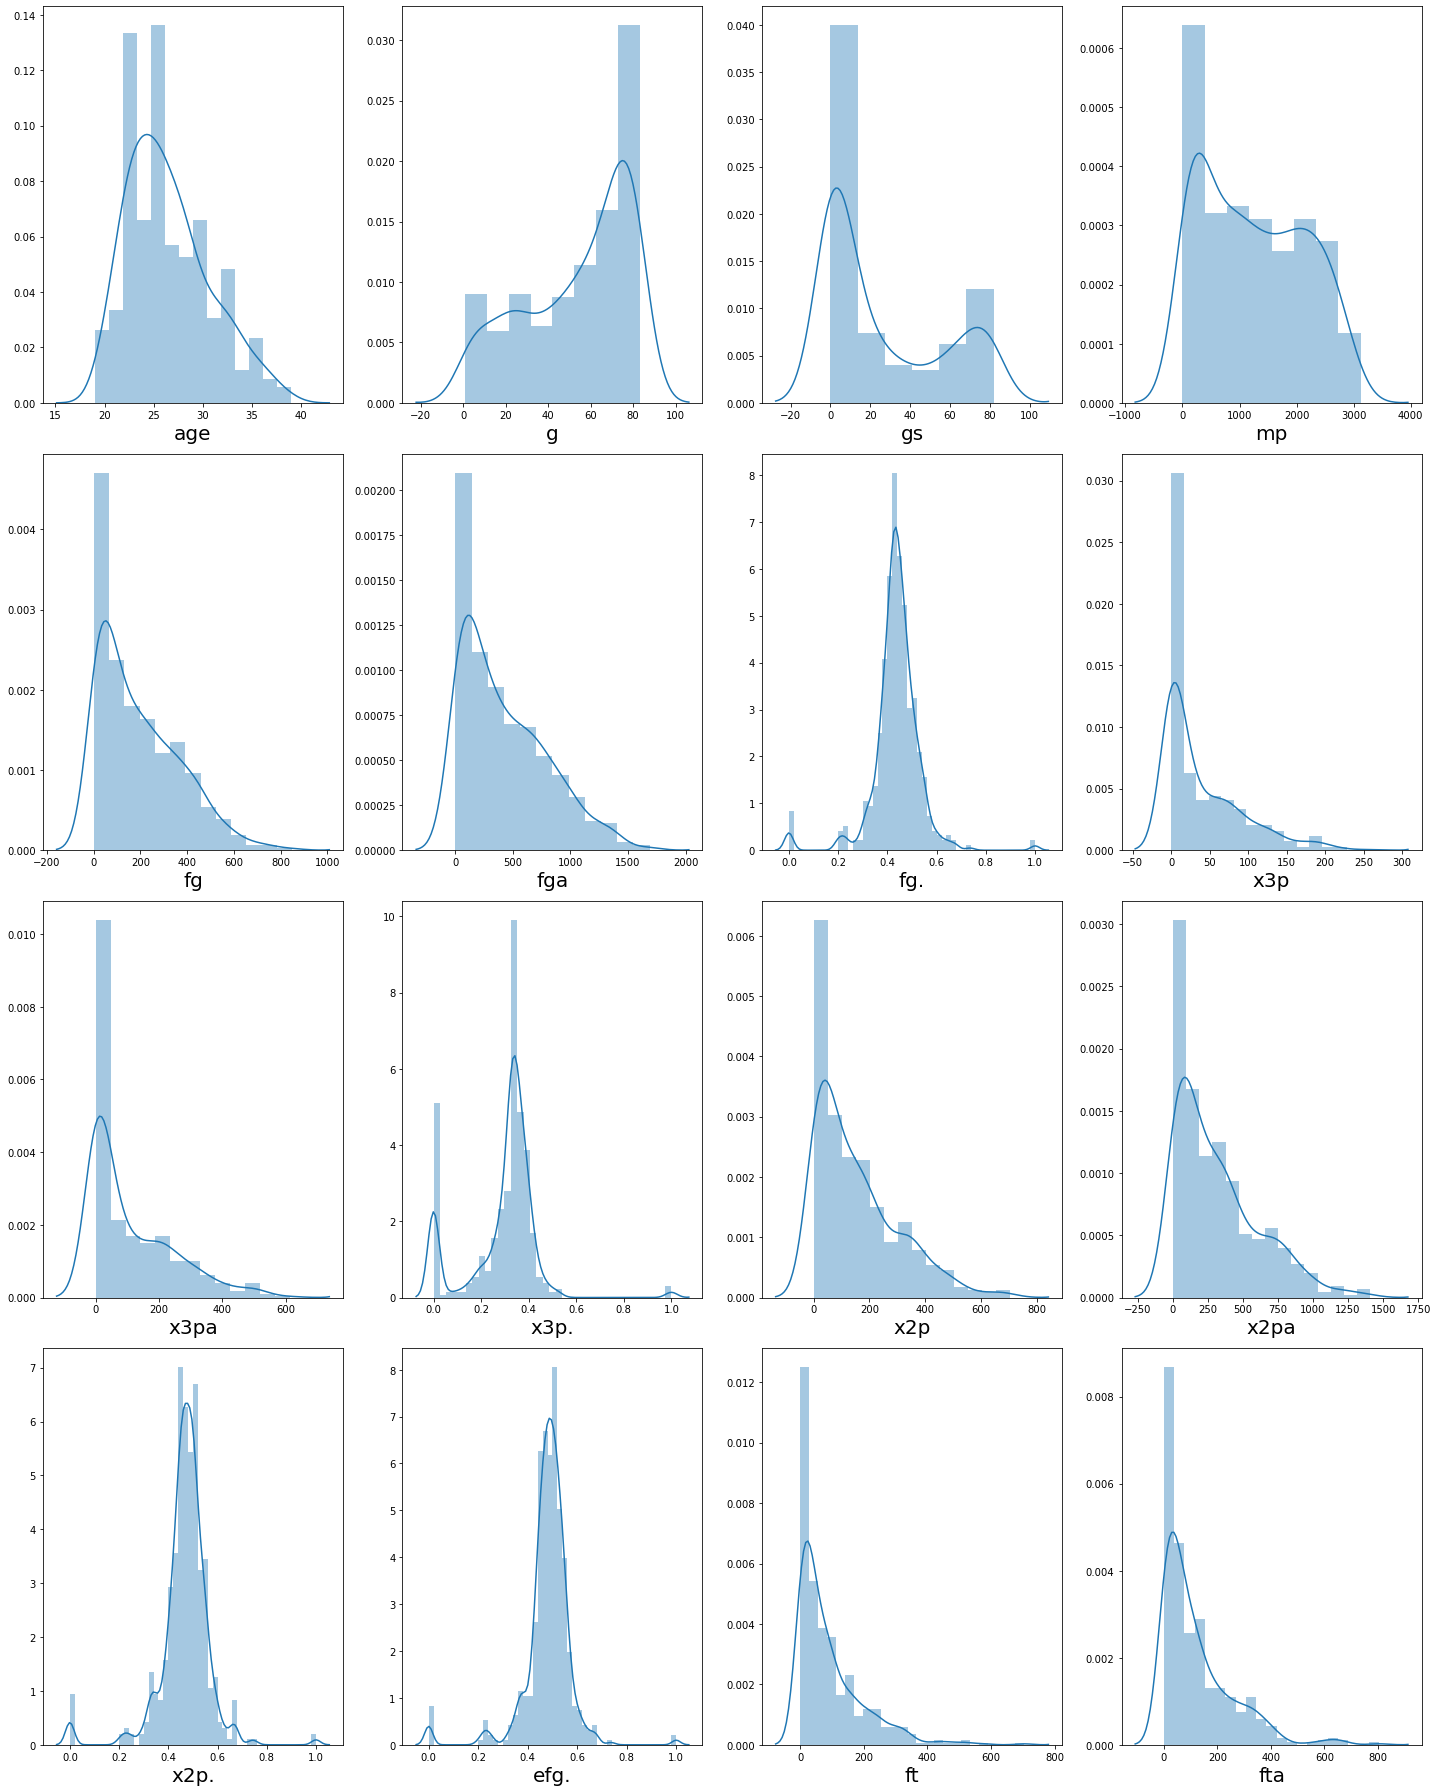

In [17]:
plt.figure(figsize=(20,25))
plotno = 1

for col in numeric_col:
    if plotno <= 16:
        ax = plt.subplot(4,4, plotno)
        sns.distplot(data[col])
        plt.xlabel(col, fontsize = 20)
    plotno += 1
plt.tight_layout()

- The data distribution looks quite decent enough.
- great let's go ahead!

### ***` Handling Categorical Variables`***

In [18]:
cat_col

['pos']

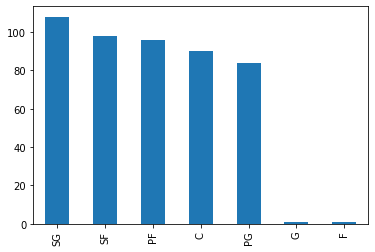

In [19]:
data['pos'].value_counts().plot.bar()
plt.show()

In [20]:
dummy_data = pd.get_dummies(data['pos'], prefix='pos', drop_first=True)
dummy_data.head()

,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,0,0,0,0,1,0
1,0,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,0


In [21]:
data.drop('pos', axis=1, inplace=True)

In [22]:
new_data = pd.concat([data, dummy_data], axis=1)

### ***`Separating Dependent and Independent variables`***

In [23]:
x = new_data.drop('pts', axis=1)
y = new_data['pts']

- let's observe the relationship between independent(x) and dependent(y) variable

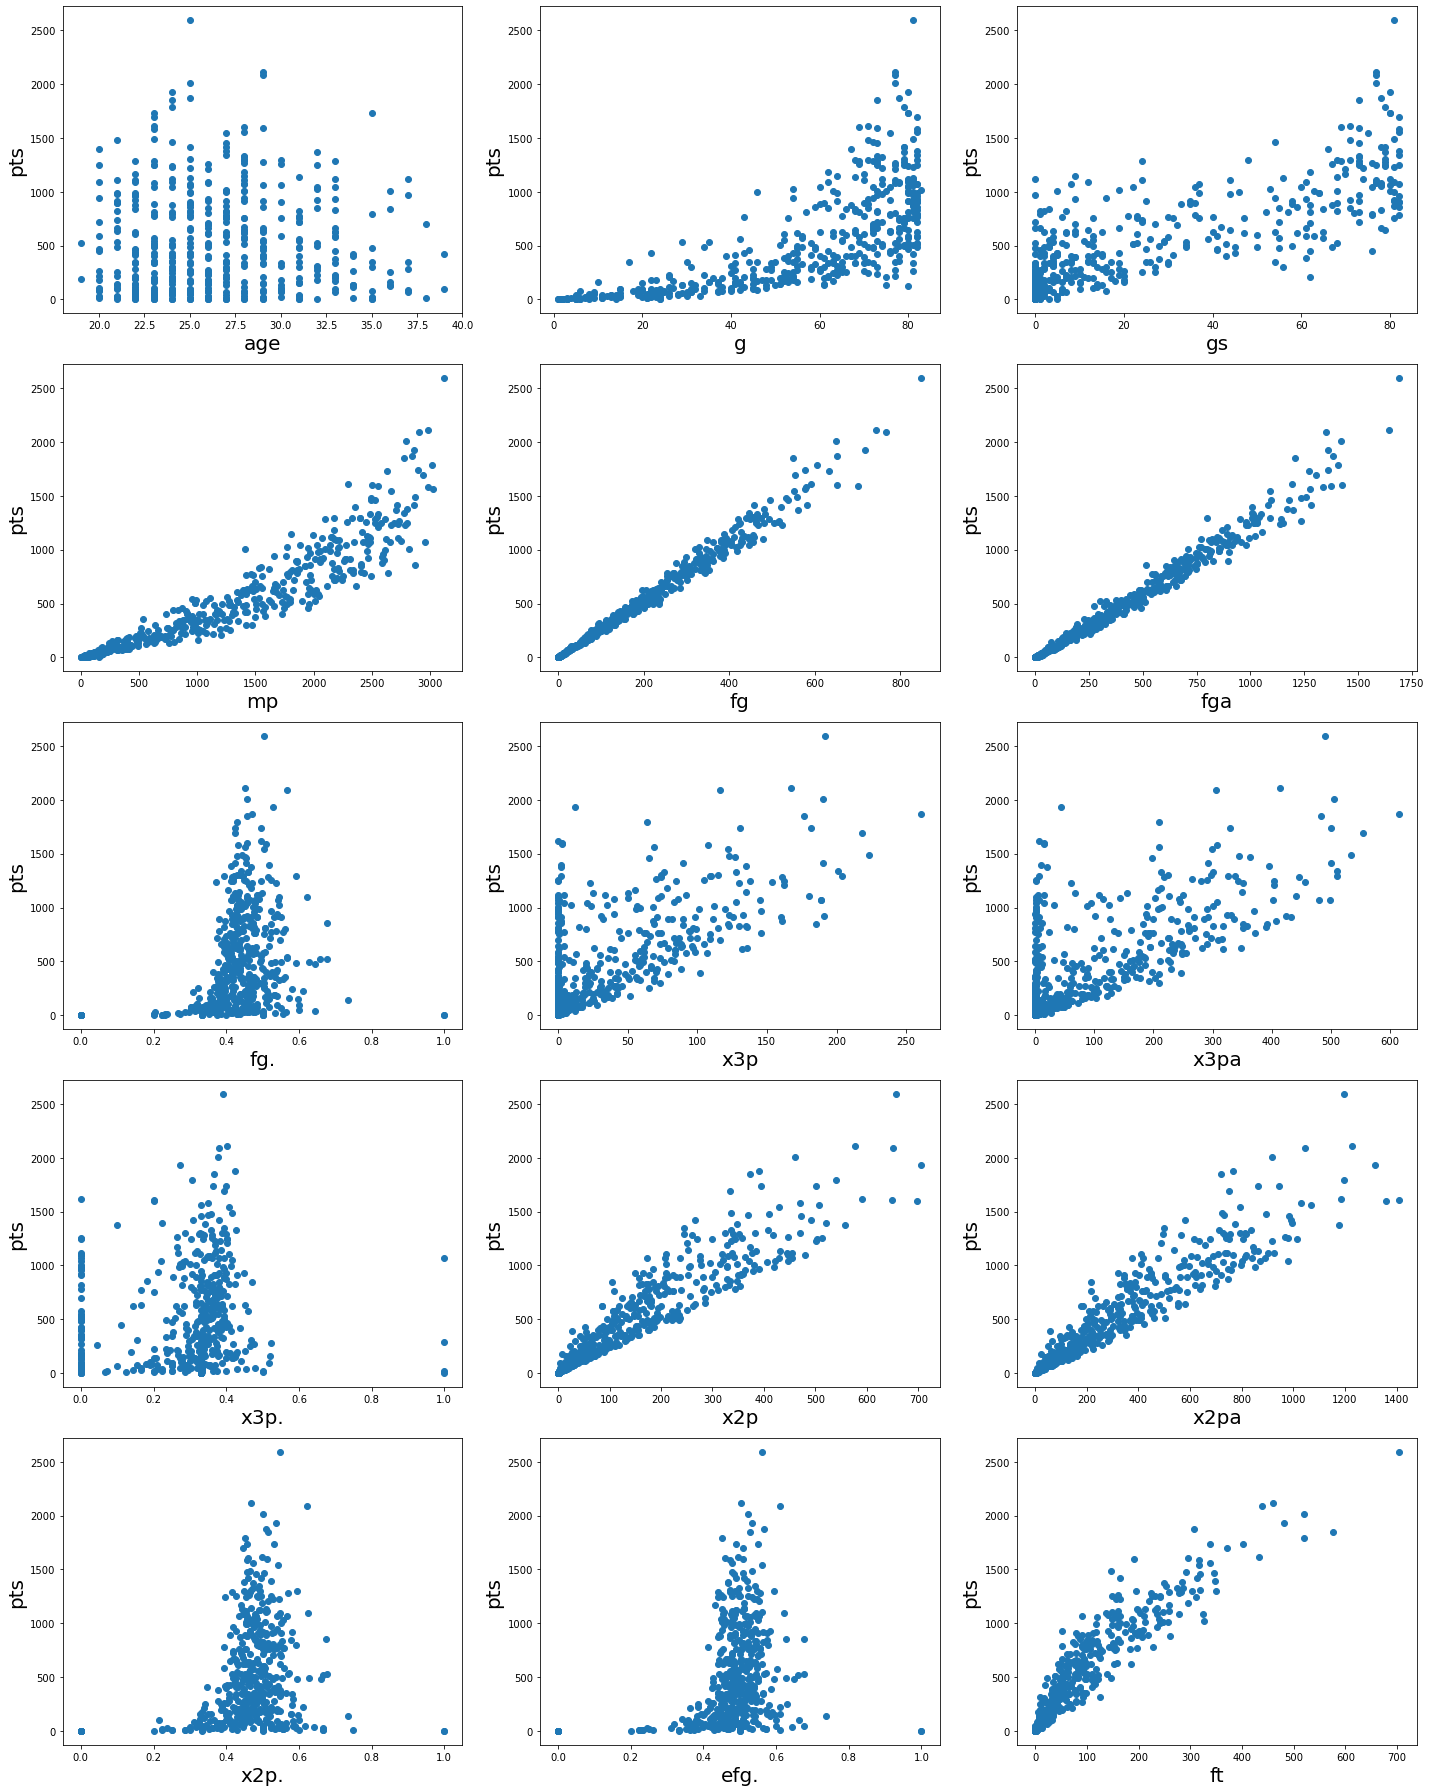

In [24]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25))
plotno = 1

for col in x:
    if plotno <= 15:
        ax = plt.subplot(5,3, plotno)
        plt.scatter(x[col], y)
        plt.xlabel(col, fontsize = 20)
        plt.ylabel('pts', fontsize = 20)
    plotno += 1
plt.tight_layout()

- The relationship between the dependent and independent variable look `fairly linear`, thus our linearity assumption is `satisfied`.
- let's move ahead and `check for multicolinearity`.

### ***`Data Standardization and Normalization`***

### (a). **Normaliz variables**

In [25]:
scale = Normalizer()
x_scale = scale.fit_transform(x)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_scale,y, test_size = 0.2, random_state = 0)

In [27]:
knr = KNeighborsRegressor()
knr.fit(x_train, y_train)

# Predict
x_test_pred = knr.predict(x_test)
x_train_pred = knr.predict(x_train)

# Accuracy
print("test pred   : ", r2_score(x_test_pred, y_test))
print("train pred  : ", r2_score(x_train_pred, y_train))

# Root Mean Square Error
print("RMSE        : ",np.sqrt(mean_squared_error(y_test,x_test_pred)))

test pred   :  0.6705092998788866
train pred  :  0.7297503932164529
RMSE        :  227.31102590943536


### (b). **Standard Scale**

In [28]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [30]:
knr_scaled = KNeighborsRegressor()
knr_scaled.fit(x_train,y_train)

# Predict
x_test_pred = knr_scaled.predict(x_test)
x_train_pred = knr_scaled.predict(x_train)

# Accuracy
print("test pred   : ", r2_score(x_test_pred, y_test))
print("train pred  : ", r2_score(x_train_pred, y_train))

# Root Mean Square Error
print("RMSE        : ",np.sqrt(mean_squared_error(y_test,x_test_pred)))

test pred   :  0.9432268897221986
train pred  :  0.9663764151234298
RMSE        :  101.85971153175986


- As we can see: 
   - **As compare to `Normalized data` `Standard Scale data` gives `better accuracy for both train as well as test data`.**
- In standard scale data 
   - It's look like our `train data score` is **larger** on the `test data` it's mean data is **underfitted**.
 

### ***`Regularization:`***
- Let's see if our model is `underfitting` our training data or not.

#### 1. **`Lasso Regression`**
- **LassoCV** will **return best alpha** and **coeff.** after performing 10 CV

In [31]:
lasscv = LassoCV(alphas = None, cv = 10, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

# best alpha parameter
alpha = lasscv.alpha_

- now that we have `best parameter`
- let's use **lasso Regression** and see how well our data had fitted before

In [32]:
lass_reg = Lasso(alpha)
lass_reg.fit(x_train, y_train)

# Checking Lasso Score
print("Score for train :",round(lass_reg.score(x_train, y_train), 2)*100)
print("Score for test  :",round(lass_reg.score(x_test, y_test), 2)*100)

Score for train : 100.0
Score for test  : 100.0


**Actual `vs` Prediction**

In [33]:
y_test_pred = lass_reg.predict(x_test)
df = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_test_pred.tolist()})
df.head()

,Actual Points,Predicted Points
0,436,435.958194
1,202,202.020353
2,0,-0.189189
3,248,248.095654
4,403,403.174182


- our score for `test data` as well as for `train data` (99.99%) comes different as before using regularization. So, it is fair to say our KNRegressor model did **underfit** the data.
- Let's conform it again using `Ridge Regression`.

#### 2. **`Ridge Regression`**
- **RidgeCV** will **return best alpha** and **coeff.** after performing 10 CV
- We will pass an array of random numbers for ridgeCV to select best alpha from them

In [34]:
alpha = np.random.uniform(low = 0, high = 10, size = (50,))
ridgecv = RidgeCV(alphas= alpha, cv = 10 , normalize=True)
ridgecv.fit(x_train, y_train)

# best alpha parameter
alpha = ridgecv.alpha_

- now that we have `best parameter`
- let's use **Ridge Regression** and see how well our data had fitted before

In [35]:
ridge_reg = Ridge(alpha = alpha)
ridge_reg.fit(x_train, y_train)

# Checking Lasso Score
print("Score for train :",round(ridge_reg.score(x_train, y_train), 2)*100)
print("Score for test  :",round(ridge_reg.score(x_test, y_test), 2)*100)

Score for train : 100.0
Score for test  : 100.0


**Actual `vs` Prediction**

In [36]:
y_test_pred = ridge_reg.predict(x_test)
df = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_test_pred.tolist()})
df.head()

,Actual Points,Predicted Points
0,436,436.114447
1,202,201.989194
2,0,-0.458162
3,248,247.920562
4,403,403.260280


- our score for `test data` as well as for `train data` (99.99%) comes different as before using regularization. So, it is fair to say our KNRegressor model did **underfit** the data.

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **`Q.(B)`** 
### **In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage**.
## ***`Solution`:-***

#### **`Importing required packages`**

In [37]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
import requests
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

In [38]:
response = urllib.request.urlopen('https://www.php.net/')
html = response.read()
soup = BeautifulSoup(html,"lxml").get_text()

In [39]:
words = nltk.word_tokenize(soup)

#### **`Lemmatization`**
- Lemmatization technique is like stemming. The output we will get after lemmatization is called ‘lemma’, which is a root word rather than root stem, the output of stemming. After lemmatization, we will be getting a valid word that means the same thing.
  - **`Stemming`** is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems. 
     - `For example`, the stem of the words eating, eats, eaten is **eat**.
- NLTK provides **WordNetLemmatizer class** which is a thin wrapper around the wordnet corpus. This class uses morphy() function to the WordNet CorpusReader class to find a lemma.

In [40]:
wrl = WordNetLemmatizer()  # lemmatization

In [41]:
corpus = []
for i in words:
    # except word contain char a-zA-Z all other special char and numbers get removed
    review = re.sub('[^a-zA-Z]',' ',i)
    
    # all text data convert into lower case
    review = review.lower()
    
    # split text into words
    review = review.split()
    
    # remove stopwords and then convert remaining simailar words into single meaingful word
    review = [wrl.lemmatize(re) for re in review if re not in set(stopwords.words('english'))]
    
    # join words and make one again text 
    review = ' '.join(review)
    
    # append that text data into corpuss_data list
    corpus.append(review)

- here we restricted , data contains some blanks space so for avoid that blank space we take `only that words which is haivng legth greater then one`.

In [42]:
new_corpus = [cor for cor in corpus if len(cor) > 1]

In [43]:
len(new_corpus)

1590

#### **`Calculating Frequency Distribution`**

In [44]:
fdist = nltk.FreqDist(new_corpus)

In [45]:
type(fdist)

nltk.probability.FreqDist

- **Printing the top 25 words with their frequency**

In [46]:
top_N = 25

pd.DataFrame(fdist.most_common(top_N),columns=['Word','Frequency'])


,Word,Frequency
0,php,149
1,release,80
2,found,45
3,downloads,44
4,source,43
5,please,40
6,version,38
7,page,33
8,change,32
9,list,26


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **`Q.(C)`** 
### **In this assignment we have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.**
## ***`Solution`:-***

#### **`Importing required packages`**

In [47]:
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

#### **Visualizing the image `before compressing`**

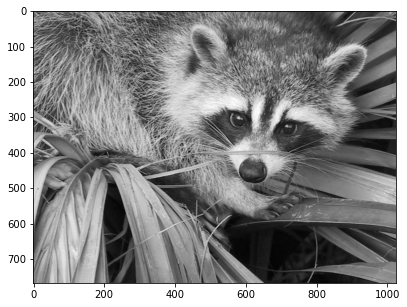

In [48]:
Racoon = scipy.misc.face(gray=True)
plt.figure(figsize=(10,5))
plt.imshow(Racoon,plt.cm.gray)
plt.show()

- **Getting rows and columns of the image**

In [49]:
rows = Racoon.shape[0]
columns = Racoon.shape[1]
image = Racoon.reshape(rows*columns,1)

#### **`Compressing Image`**
- **Using `KMeans` to fit the image**

In [50]:
Kmeans = KMeans(n_clusters=5)
Kmeans.fit(image)

KMeans(n_clusters=5)

In [51]:
clusters = np.asarray(Kmeans.cluster_centers_)
labels = np.asarray(Kmeans.labels_)
labels = labels.reshape(rows,columns)

- **Save the compressed image**

In [52]:
plt.imsave('compressed_racoon.png',labels)

#### **Visualize the compressed image**

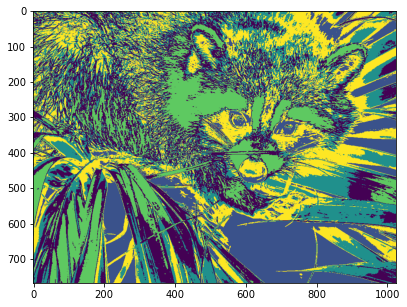

In [53]:
image = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10,5))
plt.imshow(image)
plt.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **`Q.(D)`** 
### **In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.**
## ***`Solution`:-***

#### **`Importing required packages`**

In [54]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

#### **`Loading data`**

In [55]:
data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### **`Separating Independent and Dependent variable`**

In [56]:
X = df.iloc[:,:].values
y = df.iloc[:,4].values

In [57]:
print(X.shape)
print(y.shape)

(150, 5)
(150,)


#### **`Encoding and Transforming`**

In [58]:
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

In [59]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### **`Tranforming data into 3Dimesional`**

In [60]:
pca = PCA(n_components=3)
X = pca.fit_transform(X)

#### **`Visualizing`**

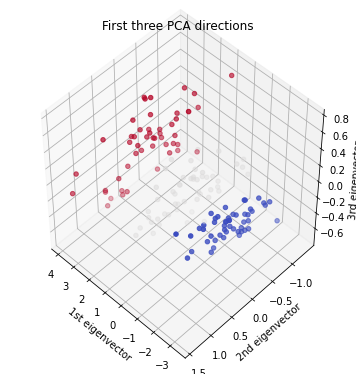

In [61]:
fig = plt.figure(1, figsize=(5, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.coolwarm)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **`Q.(E)`** 
### **In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.**
## ***`Solution`:-***

#### **`Importing required packages`**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

#### **1. `Reading data, datetime index`**

In [63]:
df = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')

In [64]:
df

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


- problem with data (last row)
   - as we can see dataset contain unnecessary row so we have to remove that.

In [65]:
df.drop(df.tail(1).index, inplace = True)

In [66]:
df.isnull().sum().sum()

0

- Adding `Date` column

In [67]:
df['Date'] = pd.to_datetime('190'+df.Month,format='%Y-%m')

In [68]:
df.head()

,Month,Sales of shampoo over a three year period,Date
0,1-01,266.0,1901-01-01
1,1-02,145.9,1901-02-01
2,1-03,183.1,1901-03-01
3,1-04,119.3,1901-04-01
4,1-05,180.3,1901-05-01


- Removing unnecessary column

In [69]:
df = df.drop(columns=['Month'])
df.head()

,Sales of shampoo over a three year period,Date
0,266.0,1901-01-01
1,145.9,1901-02-01
2,183.1,1901-03-01
3,119.3,1901-04-01
4,180.3,1901-05-01


In [70]:
df.set_index('Date',inplace=True)

In [71]:
df.head()

,Sales of shampoo over a three year period
Date,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1901-01-01 to 1903-12-01
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sales of shampoo over a three year period  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


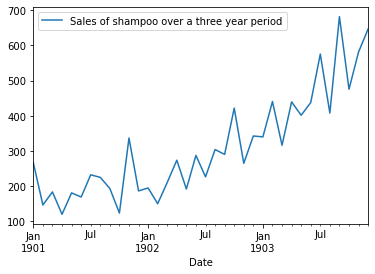

In [73]:
df.plot()
plt.show()

#### **2. `ARIMA with Python`**

- The `statsmodels` library provides the capability to fit an `ARIMA` model.
   - An ARIMA model can be created using the statsmodels library as follows:
     - Define the model by **calling ARIMA()** and **passing in the p, d, and q parameters**.
     - The model is prepared on the training data by **calling the fit()** function.
     - Predictions can be made by **calling the predict()** function and specifying the index of the time or times to be predicted.
      
- First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

- When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Tue, 30 Mar 2021   AIC                            406.340
Time:                                                 22:00:22   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

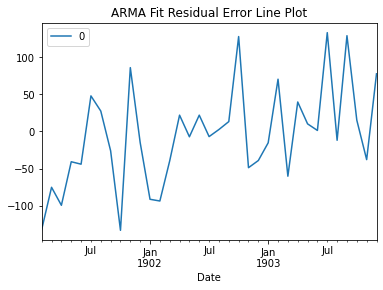

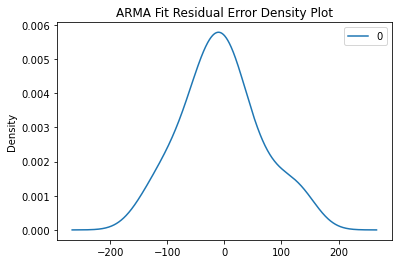

                0
count   35.000000
mean    -5.495183
std     68.132883
min   -133.296561
25%    -42.477865
50%     -7.186587
75%     24.748375
max    133.238011


In [74]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()
print(residuals.describe())

#### **3. `Rolling Forecast ARIMA Model`**

In [75]:
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=349.117734, expected=342.300000
predicted=306.513002, expected=339.700000
predicted=387.376436, expected=440.400000
predicted=348.154209, expected=315.900000
predicted=386.308798, expected=439.300000
predicted=356.082063, expected=401.300000
predicted=446.379484, expected=437.400000
predicted=394.737309, expected=575.500000
predicted=434.915469, expected=407.600000
predicted=507.923369, expected=682.000000
predicted=435.482710, expected=475.300000
predicted=652.743868, expected=581.300000
predicted=546.343505, expected=646.900000
Test MSE: 6958.328


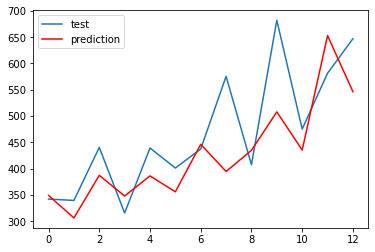

In [76]:
# plot

plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()

#### **4. `Configuring an ARIMA Model`**

- The classical approach for fitting an `ARIMA model` is to follow the **Box-Jenkins Methodology**.
   - This is a process that uses time series analysis and diagnostics to discover good parameters for the ARIMA model.
     - In summary, the steps of this process are as follows:
        - `Model Identification` Use plots and summary statistics to identify trends, seasonality, and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required. 
        - `Parameter Estimation` Use a fitting procedure to find the coefficients of the regression model.
        - `Model Checking` Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model.
- The process is repeated until either a desirable level of fit is achieved on the in-sample or out-of-sample observations (e.g. training or test datasets).

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------